In [2]:
import csv

In [101]:
import pandas as pd


# Step 1: Read the CSV files
df2 = pd.read_csv('../Data/범죄발생_검거현황(11~22).csv')
df1 = pd.read_csv('../Data/범죄발생_검거현황(94~10).csv')
df1.drop(columns=['죄종별(1)'], inplace=True)
df2.drop(columns=['죄종별(1)'], inplace=True)

In [102]:
df1.columns=['연도','범죄 총 건수', '검거율', '검거인원', '남(검거수)', '여(검거수)']
df2.columns=['연도','범죄 총 건수', '검거율', '검거인원', '남(검거수)', '여(검거수)']

,연도,total
0,1994,1309326
1,1995,1329694
2,1996,1419811
3,1997,1536652
4,1998,1712233
5,1999,1654064
6,2000,1739558
7,2001,1860687
8,2002,1833271
9,2003,1894762


In [19]:
df1

,연도,범죄 총 건수,검거율,검거인원,남(검거수),여(검거수)
0,1994,1309326,90.4,1423618,1240591,183027
1,1995,1329694,90.4,1450159,1250532,199627
2,1996,1419811,90.7,1551400,1325056,226344
3,1997,1536652,91.0,1672355,1440974,231381
4,1998,1712233,92.3,1862996,1574056,288940
5,1999,1654064,95.2,1926158,1612592,313566
6,2000,1739558,88.7,1897415,1606484,290931
7,2001,1860687,88.3,1980174,1668456,311718
8,2002,1833271,92.4,1942987,1631803,311184
9,2003,1894762,88.6,1917210,1596351,320859


## 연도별 범죄 총 건수 시각화

C:\Users\jeaji\AppData\Local\Temp\ipykernel_9896\3685260045.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_for_plot['퍼센트변화'] = total_for_plot['범죄 총 건수'].pct_change() * 100
C:\Users\jeaji\AppData\Local\Temp\ipykernel_9896\3685260045.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='연도', y='범죄 총 건수', data=total_for_plot, palette='Set2', ax=ax[0])


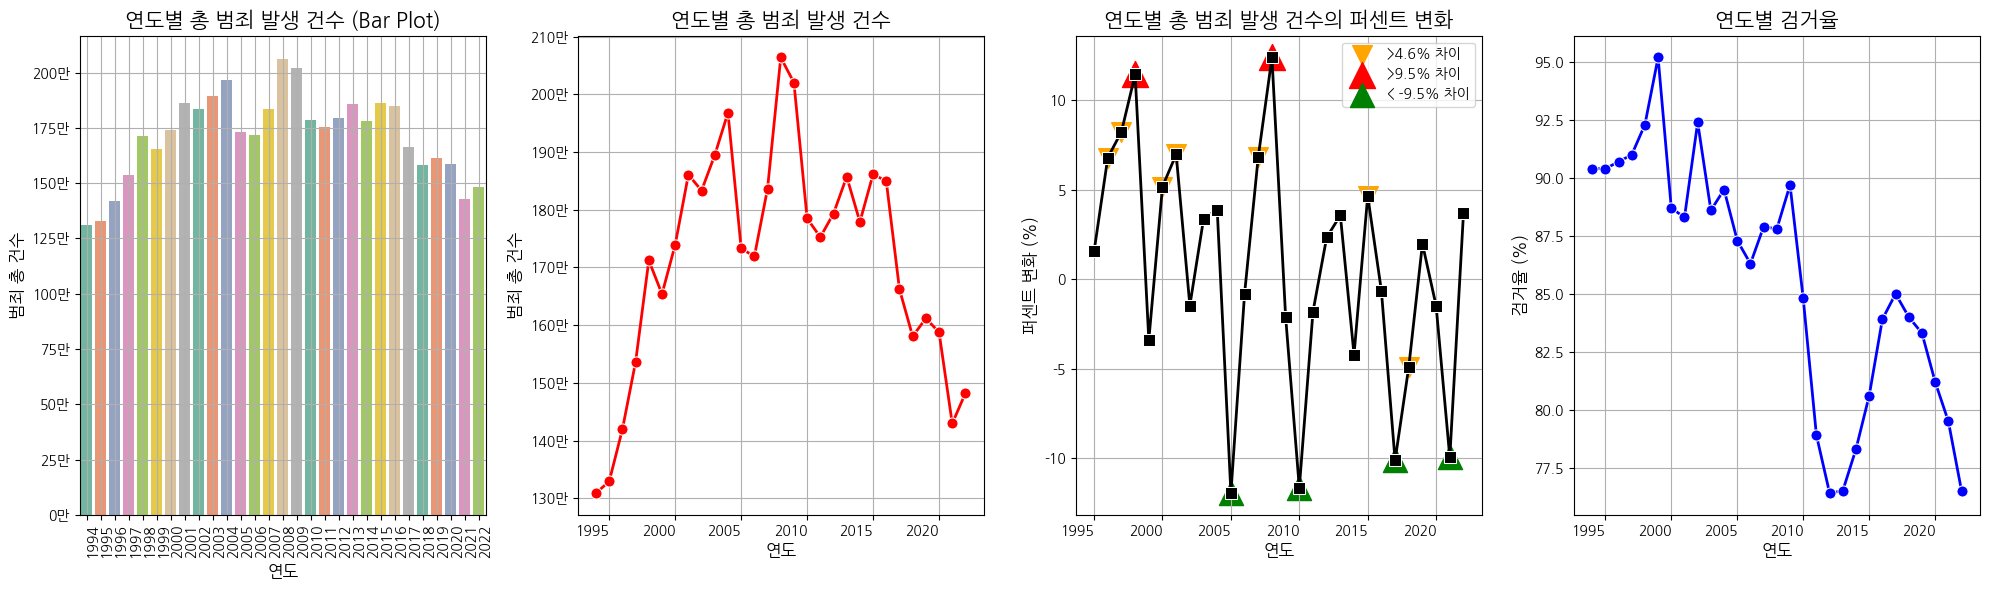

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from matplotlib.ticker import FuncFormatter



#94년도 데이터 계산을 위한 93년 데이터 추가
total = pd.concat([df1, df2])
new_row = pd.DataFrame({'연도': ['1993'], '범죄 총 건수': [1304349]})
total = pd.concat([new_row, total]).reset_index(drop=True)

total['범죄 총 건수'] = pd.to_numeric(total['범죄 총 건수'], errors='coerce')

total['차이'] = total['범죄 총 건수'].diff()  
total['퍼센트변화'] = total['범죄 총 건수'].pct_change() * 100  # 퍼센트로 계산




total_for_plot = total[total['연도'] != '1993']
total_for_plot['퍼센트변화'] = total_for_plot['범죄 총 건수'].pct_change() * 100


threshold_5 = 4.6
threshold_10 = 9.5

fig, ax = plt.subplots(1, 4, figsize=(20, 6))

sns.barplot(x='연도', y='범죄 총 건수', data=total_for_plot, palette='Set2', ax=ax[0])
ax[0].set_title('연도별 총 범죄 발생 건수 (Bar Plot)', fontsize=15)
ax[0].set_xlabel('연도', fontsize=12)
ax[0].set_ylabel('범죄 총 건수', fontsize=12)
formatter = FuncFormatter(lambda x, pos: "{:,.0f}".format(x//10000) + "만")
ax[0].yaxis.set_major_formatter(formatter)

sns.lineplot(x='연도', y='범죄 총 건수', data=total_for_plot, marker='o', markersize=8, color='r', linewidth=2, ax=ax[1])
ax[1].set_title('연도별 총 범죄 발생 건수', fontsize=15)
ax[1].set_xlabel('연도', fontsize=12)
ax[1].set_ylabel('범죄 총 건수', fontsize=12)
ax[1].yaxis.set_major_formatter(formatter)

sns.lineplot(x='연도', y='퍼센트변화', data=total_for_plot, marker='s', markersize=8, color='black', linewidth=2, ax=ax[2])
ax[2].set_title('연도별 총 범죄 발생 건수의 퍼센트 변화', fontsize=15)
ax[2].set_xlabel('연도', fontsize=12)
ax[2].set_ylabel('퍼센트 변화 (%)', fontsize=12)


sns.lineplot(x='연도', y='검거율', data=total_for_plot, marker='o', markersize=8, color='b', linewidth=2, ax=ax[3])
ax[3].set_title('연도별 검거율', fontsize=15)
ax[3].set_xlabel('연도', fontsize=12)
ax[3].set_ylabel('검거율 (%)', fontsize=12)

diff_points_5 = total_for_plot[(total_for_plot['퍼센트변화'].abs() > threshold_5) & (total_for_plot['퍼센트변화'].abs() < threshold_10)]
ax[2].scatter(x=diff_points_5['연도'], y=diff_points_5['퍼센트변화'], color='orange', s=200, marker='v', label=f'>{threshold_5}% 차이')

diff_points_10_positive = total_for_plot[total_for_plot['퍼센트변화'] > threshold_10]
ax[2].scatter(x=diff_points_10_positive['연도'], y=diff_points_10_positive['퍼센트변화'], color='red', s=350, marker='^', label=f'>{threshold_10}% 차이')

diff_points_10_negative = total_for_plot[total_for_plot['퍼센트변화'] < -threshold_10]
ax[2].scatter(x=diff_points_10_negative['연도'], y=diff_points_10_negative['퍼센트변화'], color='g', s=300, marker='^', label=f'< -{threshold_10}% 차이')

plt.setp(ax[0].get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.setp(ax[1].get_xticklabels(), ha="right", rotation_mode="anchor")
plt.setp(ax[2].get_xticklabels(), ha="right", rotation_mode="anchor")
plt.setp(ax[3].get_xticklabels(), ha="right", rotation_mode="anchor")


ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
ax[3].grid(True)
ax[2].legend()
plt.tight_layout()

plt.show()

In [25]:
total_for_plot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1 to 29
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연도       29 non-null     object 
 1   범죄 총 건수  29 non-null     int64  
 2   검거율      29 non-null     float64
 3   검거인원     29 non-null     float64
 4   남(검거수)   29 non-null     float64
 5   여(검거수)   29 non-null     float64
 6   차이       29 non-null     float64
 7   퍼센트변화    29 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ KB


1. 발생 건수 퍼센트 변화가 과연 유의미 한 값인가?

## 범죄 유형별 성장률 뽑아내기

In [9]:
import pandas as pd

cate_df2 = pd.read_csv('../Data/유형발생건수(11~22).csv')
cate_df1 = pd.read_csv('../Data/유형발생건수(94~10).csv')

In [10]:

cate_df1.columns=['연도','강력범', '절도범', '폭력범', '지능범', '풍속범', '특별범법']
cate_df1.drop(cate_df1.index[:2], inplace=True)
cate_df1 = cate_df1.reset_index(drop=True)

In [11]:
cate_df2.columns=['연도','강력범', '절도범', '폭력범', '지능범', '풍속범', '특별경제범', '마약범','보건범','환경범','교통범', '노동범', '안보범', '선거범', '병역범', '기타범']
cate_df2.drop(cate_df2.index[:1], inplace=True)
cate_df2 = cate_df2.reset_index(drop=True)

In [12]:
# 모든 값 정수형으로 변환
numeric_cols_df2 = ['연도','강력범', '절도범', '폭력범', '지능범', '풍속범', '특별경제범', '마약범','보건범','환경범','교통범', '노동범', '안보범', '선거범', '병역범', '기타범']
numeric_cols_df1 = ['연도','강력범', '절도범', '폭력범', '지능범', '풍속범', '특별범법']

cate_df2[numeric_cols_df2] = cate_df2[numeric_cols_df2].astype(int)
cate_df1[numeric_cols_df1] = cate_df1[numeric_cols_df1].astype(int)

In [13]:
total['차이'] = total['범죄 총 건수'].diff()  
total['퍼센트변화'] = total['범죄 총 건수'].pct_change() * 100  # 퍼센트로 계산

## 범죄 94~22년까지의 라인그래프 보여주기 모든 유형

In [14]:
alldata10 = cate_df1.melt(id_vars=['연도'], var_name='범죄 유형', value_name='범죄 수')
alldata22 = cate_df2.melt(id_vars=['연도'], var_name='범죄 유형', value_name='범죄 수')

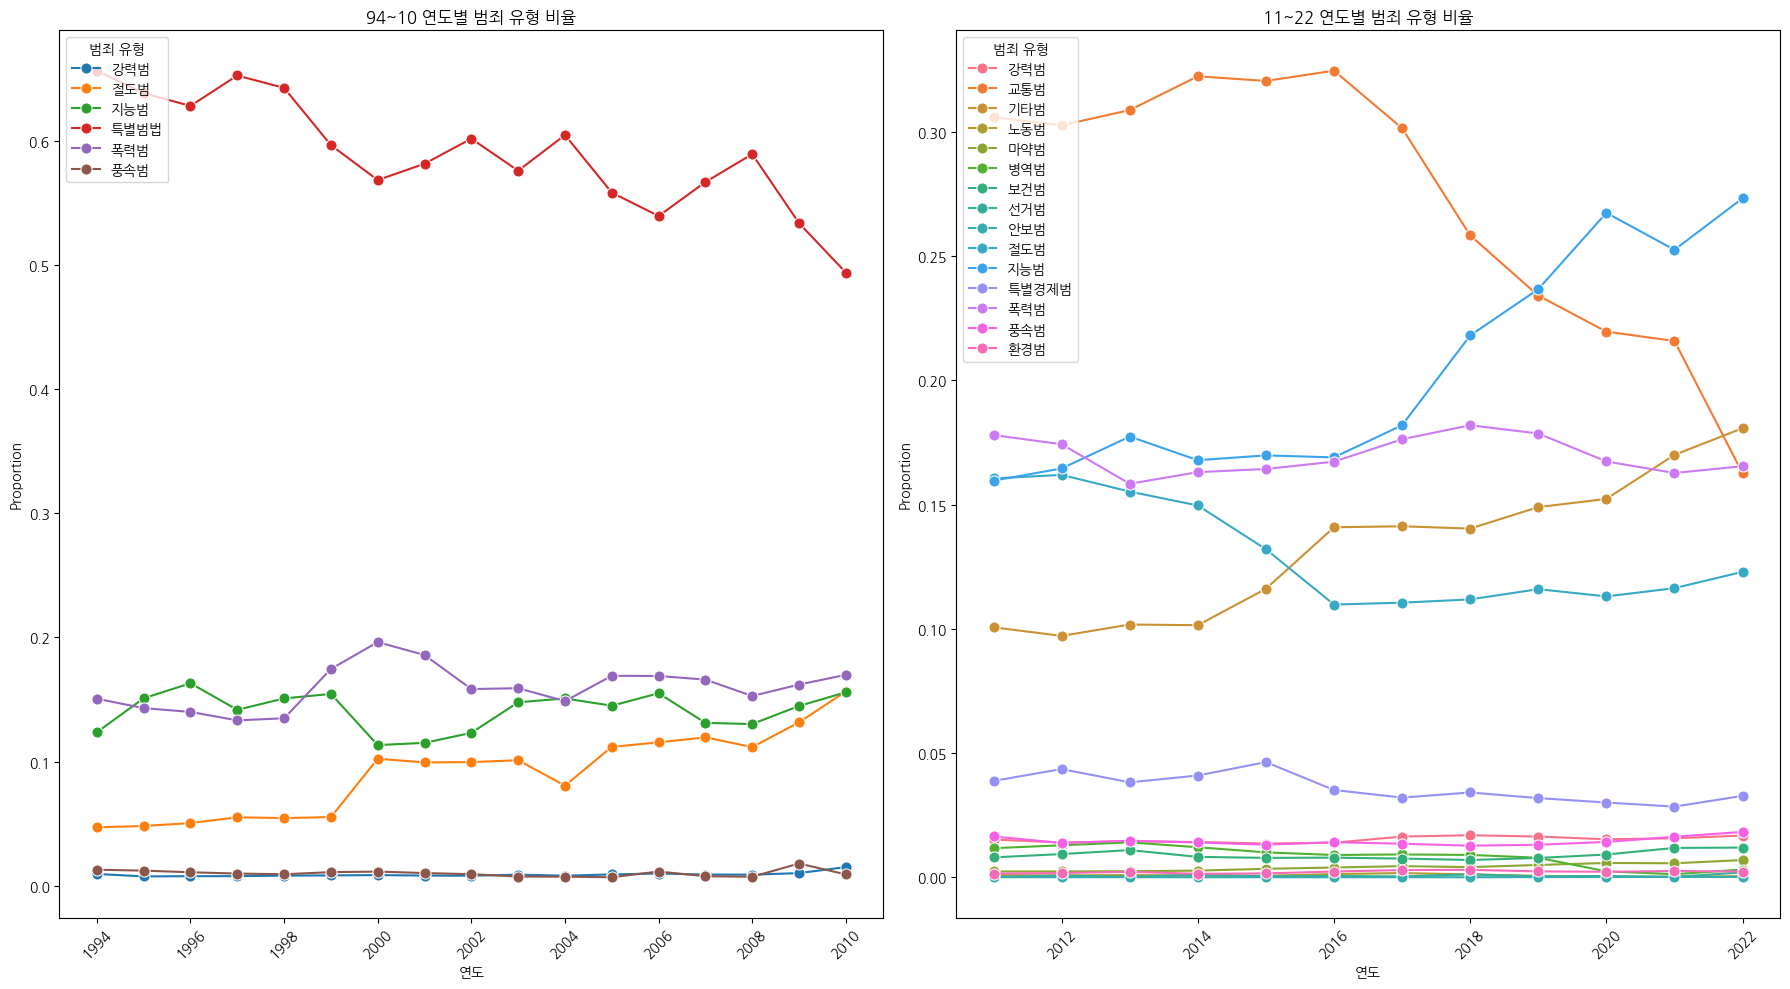

In [97]:
alldata10_proportion = alldata10.groupby(['연도', '범죄 유형'])['범죄 수'].sum().reset_index()
alldata10_proportion['proportion'] = alldata10_proportion['범죄 수'] / alldata10_proportion.groupby('연도')['범죄 수'].transform('sum')

alldata22_proportion = alldata22.groupby(['연도', '범죄 유형'])['범죄 수'].sum().reset_index()
alldata22_proportion['proportion'] = alldata22_proportion['범죄 수'] / alldata22_proportion.groupby('연도')['범죄 수'].transform('sum')

# Plot the proportion
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
sns.lineplot(x='연도', y='proportion', hue='범죄 유형', data=alldata10_proportion, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('Proportion')
plt.title('94~10 연도별 범죄 유형 비율')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')

plt.subplot(1, 2, 2)
sns.lineplot(x='연도', y='proportion', hue='범죄 유형', data=alldata22_proportion, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('Proportion')
plt.title('11~22 연도별 범죄 유형 비율')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')

plt.tight_layout()
plt.show()

## 겹치는 5개 데이터 값만 나타내기

In [61]:
# 5개 유형만 비교
cate10 = cate_df1.iloc[:, :6]
cate22 = cate_df2.iloc[:, :6]
total_cate = pd.concat([cate10, cate22], ignore_index=True)


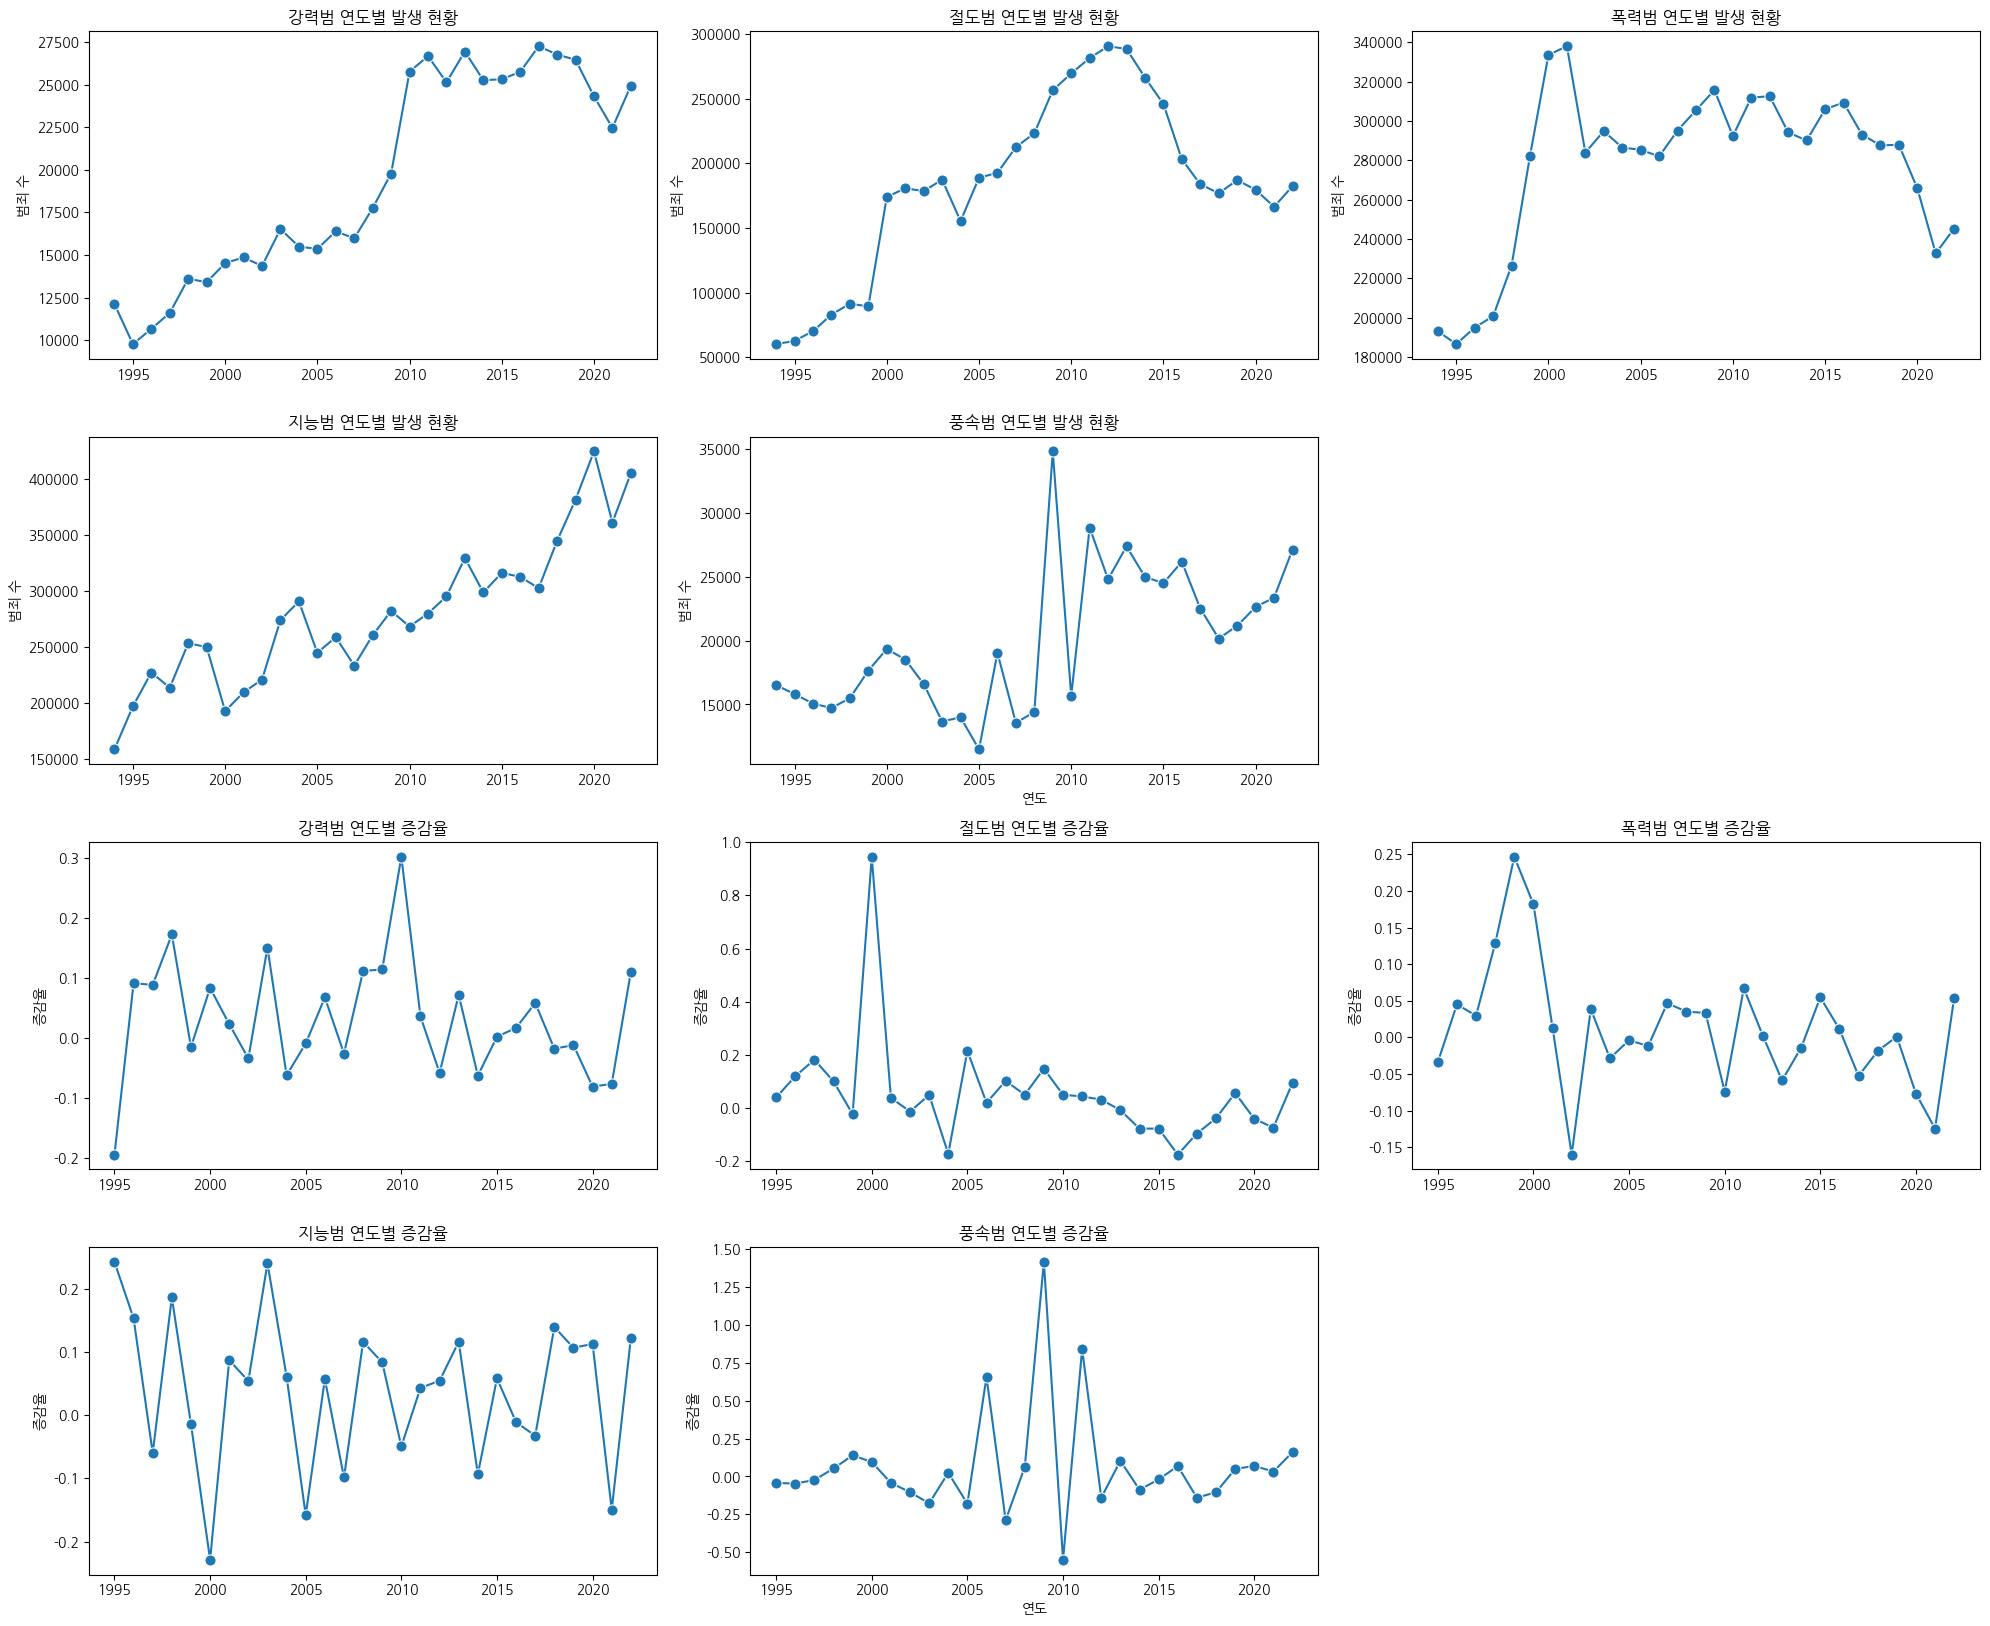

In [66]:
total_cate_growth = total_cate.set_index('연도').pct_change().reset_index()

# Plotting
plt.figure(figsize=(20, 20))

# Line plots for crime counts
plt.subplot(5, 3, 1)
sns.lineplot(x='연도', y='강력범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('범죄 수')
plt.title('강력범 연도별 발생 현황')

plt.subplot(5, 3, 2)
sns.lineplot(x='연도', y='절도범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('범죄 수')
plt.title('절도범 연도별 발생 현황')

plt.subplot(5, 3, 3)
sns.lineplot(x='연도', y='폭력범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('범죄 수')
plt.title('폭력범 연도별 발생 현황')

plt.subplot(5, 3, 4)
sns.lineplot(x='연도', y='지능범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('범죄 수')
plt.title('지능범 연도별 발생 현황')

plt.subplot(5, 3, 5)
sns.lineplot(x='연도', y='풍속범', data=total_cate, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('풍속범 연도별 발생 현황')

# Growth rate plots
plt.subplot(5, 3, 7)
sns.lineplot(x='연도', y='강력범', data=total_cate_growth, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('증감율')
plt.title('강력범 연도별 증감율')

plt.subplot(5, 3, 8)
sns.lineplot(x='연도', y='절도범', data=total_cate_growth, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('증감율')
plt.title('절도범 연도별 증감율')

plt.subplot(5, 3, 9)
sns.lineplot(x='연도', y='폭력범', data=total_cate_growth, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('증감율')
plt.title('폭력범 연도별 증감율')

plt.subplot(5, 3, 10)
sns.lineplot(x='연도', y='지능범', data=total_cate_growth, marker='o', markersize=8)
plt.xlabel('')
plt.ylabel('증감율')
plt.title('지능범 연도별 증감율')

plt.subplot(5, 3, 11)
sns.lineplot(x='연도', y='풍속범', data=total_cate_growth, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('증감율')
plt.title('풍속범 연도별 증감율')

# Adjust layout and display
plt.tight_layout()
plt.show()

## 유형별 성장률 데이터 보여주기

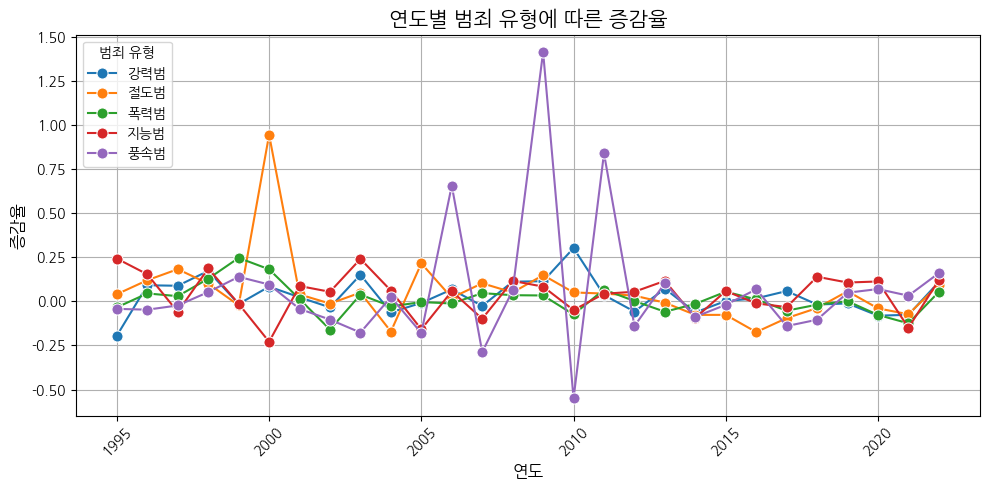

In [72]:
total_cate_growth = total_cate.set_index('연도').pct_change().reset_index()

# Melting the data for easier plotting with seaborn
total_cate_growth_melted = total_cate_growth.melt(id_vars='연도', var_name='범죄 유형', value_name='증감율')

# Plotting
plt.figure(figsize=(10,  5))
sns.lineplot(x='연도', y='증감율', hue='범죄 유형', data=total_cate_growth_melted, marker='o', markersize=8)

plt.title('연도별 범죄 유형에 따른 증감율', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('증감율', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.legend(title='범죄 유형', loc='upper left')
plt.tight_layout()
plt.show()

조금더 잘볼수있는방법..

In [129]:
# 5개의 토탈값 구하기
total_cate_sum = total_cate[['연도', '강력범', '절도범', '폭력범', '지능범', '풍속범']].groupby('연도').sum().reset_index()
total_cate_sum['5total'] = total_cate_sum[['강력범', '절도범', '폭력범', '지능범', '풍속범']].sum(axis=1)
print(total_cate_sum)


      연도    강력범     절도범     폭력범     지능범    풍속범  5total
0   1994  12114   60255  193047  158399  16515  440330
1   1995   9762   62710  186490  196845  15815  471622
2   1996  10655   70238  194891  227064  15070  517918
3   1997  11599   83063  200675  213445  14722  523504
4   1998  13602   91438  226409  253297  15497  600243
5   1999  13400   89395  282274  249769  17655  652493
6   2000  14520  173876  333630  192574  19342  733942
7   2001  14858  180704  338045  209364  18519  761490
8   2002  14353  178457  283930  220719  16605  714064
9   2003  16519  187352  294893  273867  13668  786299
10  2004  15496  155311  286464  290643  13998  761912
11  2005  15357  188780  285363  244680  11492  745672
12  2006  16397  192670  281969  258705  19040  768781
13  2007  15973  212458  295156  233213  13563  770363
14  2008  17758  223216  305508  260327  14411  821220
15  2009  19790  256423  315747  282106  34793  908859
16  2010  25771  269410  292347  268191  15673  871392
17  2011  

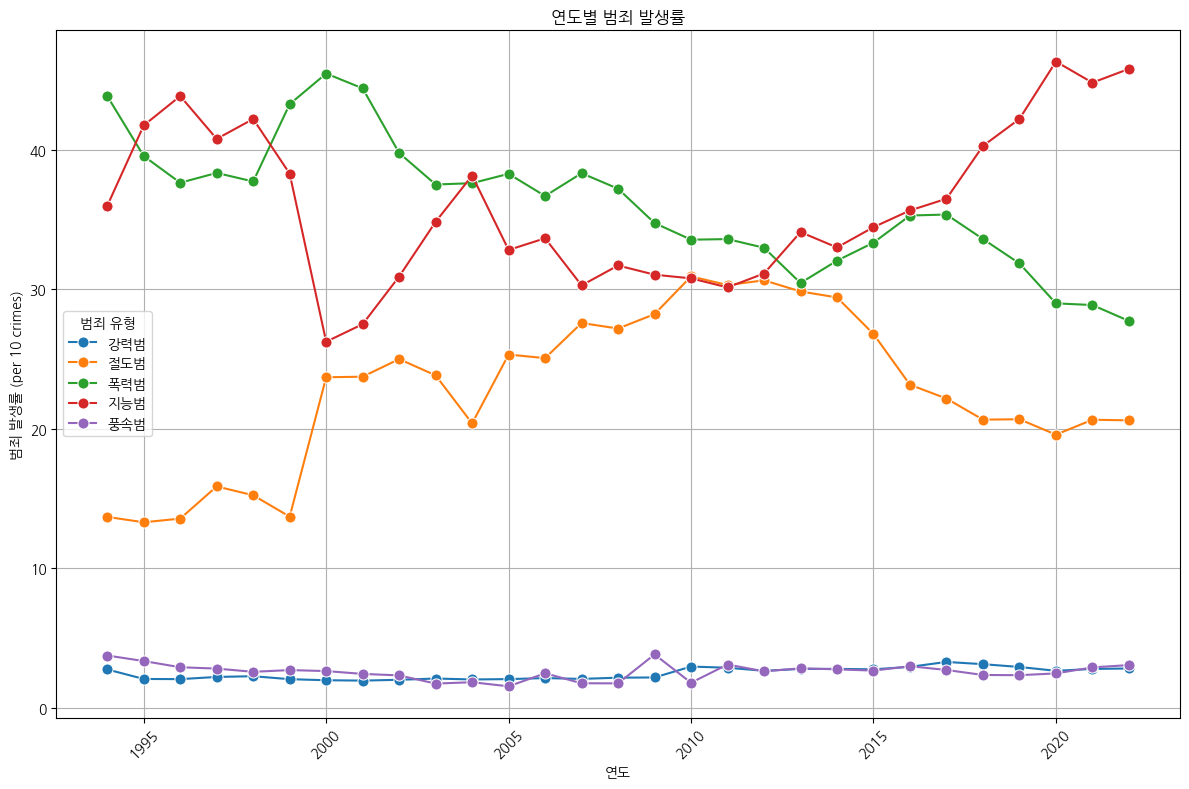

In [133]:
total_yearly = total.groupby('연도')['범죄 총 건수'].sum().reset_index()
total_yearly.columns = ['연도', 'total']
total_cate2 = pd.merge(total_cate_sum, total_yearly, on='연도')

crime_categories = ['강력범', '절도범', '폭력범', '지능범', '풍속범']
for category in crime_categories:
    total_cate2[f'{category}_발생률'] = total_cate2[category] / total_cate2['5total'] * 100

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Plot each crime category's crime rate over the years
sns.lineplot(x='연도', y='강력범_발생률', data=total_cate2, marker='o', markersize=8, label='강력범')
sns.lineplot(x='연도', y='절도범_발생률', data=total_cate2, marker='o', markersize=8, label='절도범')
sns.lineplot(x='연도', y='폭력범_발생률', data=total_cate2, marker='o', markersize=8, label='폭력범')
sns.lineplot(x='연도', y='지능범_발생률', data=total_cate2, marker='o', markersize=8, label='지능범')
sns.lineplot(x='연도', y='풍속범_발생률', data=total_cate2, marker='o', markersize=8, label='풍속범')

# Customize labels and title
plt.xlabel('연도')
plt.ylabel('범죄 발생률 (per 10 crimes)')
plt.title('연도별 범죄 발생률')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='범죄 유형')

# Show plot
plt.tight_layout()
plt.show()


In [131]:
total_cate2
# 5범죄 비율이랑 전체 범죄발생수의 사이도 볼수있다.

,연도,강력범,절도범,폭력범,지능범,풍속범,5total,total,강력범_발생률,절도범_발생률,폭력범_발생률,지능범_발생률,풍속범_발생률
0,1994,12114,60255,193047,158399,16515,440330,1309326,2.751118,13.684055,43.841437,35.972793,3.750596
1,1995,9762,62710,186490,196845,15815,471622,1329694,2.069878,13.296666,39.542261,41.737875,3.353321
2,1996,10655,70238,194891,227064,15070,517918,1419811,2.057275,13.561606,37.629702,43.841689,2.909727
3,1997,11599,83063,200675,213445,14722,523504,1536652,2.215647,15.866736,38.333040,40.772372,2.812204
4,1998,13602,91438,226409,253297,15497,600243,1712233,2.266082,15.233497,37.719557,42.199076,2.581788
5,1999,13400,89395,282274,249769,17655,652493,1654064,2.053662,13.700530,43.260847,38.279185,2.705776
6,2000,14520,173876,333630,192574,19342,733942,1739558,1.978358,23.690700,45.457270,26.238313,2.635358
7,2001,14858,180704,338045,209364,18519,761490,1860687,1.951175,23.730318,44.392572,27.493992,2.431943
8,2002,14353,178457,283930,220719,16605,714064,1833271,2.010044,24.991737,39.762542,30.910255,2.325422
9,2003,16519,187352,294893,273867,13668,786299,1894762,2.100855,23.827068,37.503927,34.829880,1.738270


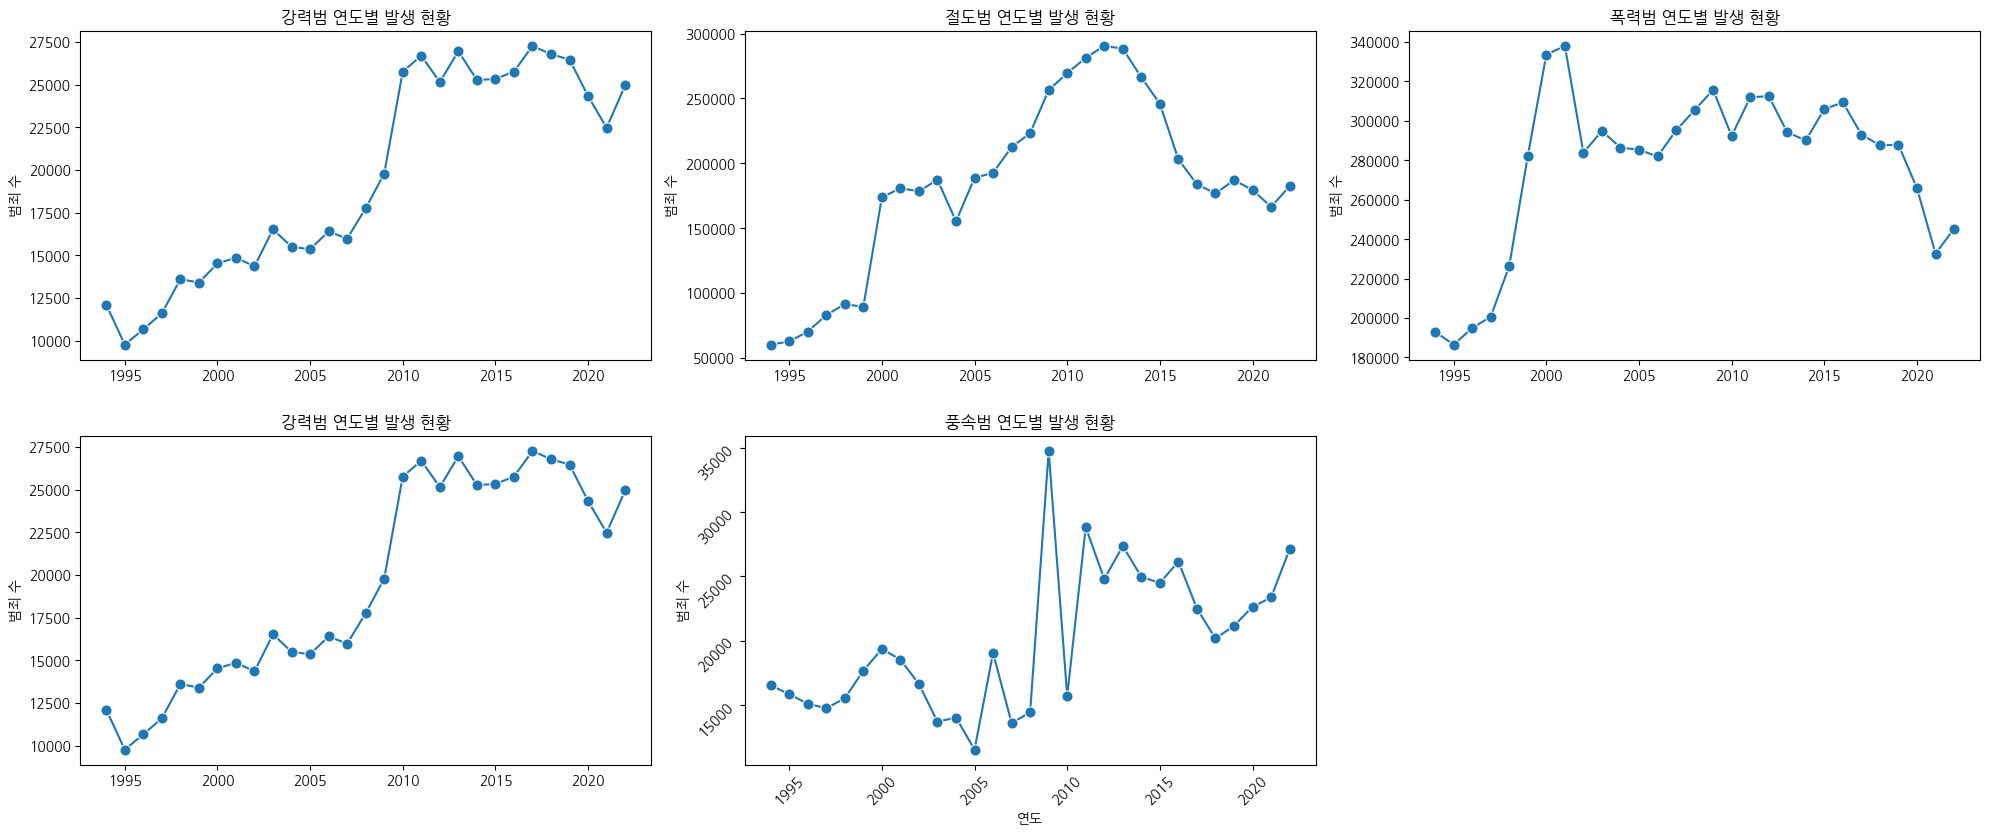

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

# subplot 1
plt.subplot(5, 3, 1)
sns.lineplot(x='연도', y='강력범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')  # x축 라벨 비움
plt.ylabel('범죄 수')
plt.title('강력범 연도별 발생 현황')

# subplot 2
plt.subplot(5, 3, 2)
sns.lineplot(x='연도', y='절도범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')  # x축 라벨 비움
plt.ylabel('범죄 수')
plt.title('절도범 연도별 발생 현황')

# subplot 3
plt.subplot(5, 3, 3)
sns.lineplot(x='연도', y='폭력범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')  # x축 라벨 비움
plt.ylabel('범죄 수')
plt.title('폭력범 연도별 발생 현황')

# subplot 4
plt.subplot(5, 3, 4)
sns.lineplot(x='연도', y='강력범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')  # x축 라벨 비움
plt.ylabel('범죄 수')
plt.title('강력범 연도별 발생 현황')

# subplot 5
plt.subplot(5, 3, 5)
sns.lineplot(x='연도', y='풍속범', data=total_cate, marker='o', markersize=8)
plt.xlabel('연도')  # x축 라벨 추가
plt.ylabel('범죄 수')
plt.title('풍속범 연도별 발생 현황')

# 축 라벨 회전
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()


In [119]:
crime_data_df1 = cate10.melt(id_vars=['연도'], var_name='범죄 유형', value_name='범죄 수')
crime_data_df2 = cate22.melt(id_vars=['연도'], var_name='범죄 유형', value_name='범죄 수')

In [120]:
crime_data_df1

,연도,범죄 유형,범죄 수
0,1994,강력범,12114
1,1995,강력범,9762
2,1996,강력범,10655
3,1997,강력범,11599
4,1998,강력범,13602
...,...,...,...
80,2006,풍속범,19040
81,2007,풍속범,13563
82,2008,풍속범,14411
83,2009,풍속범,34793


## 종합적인 그래프 보여주기

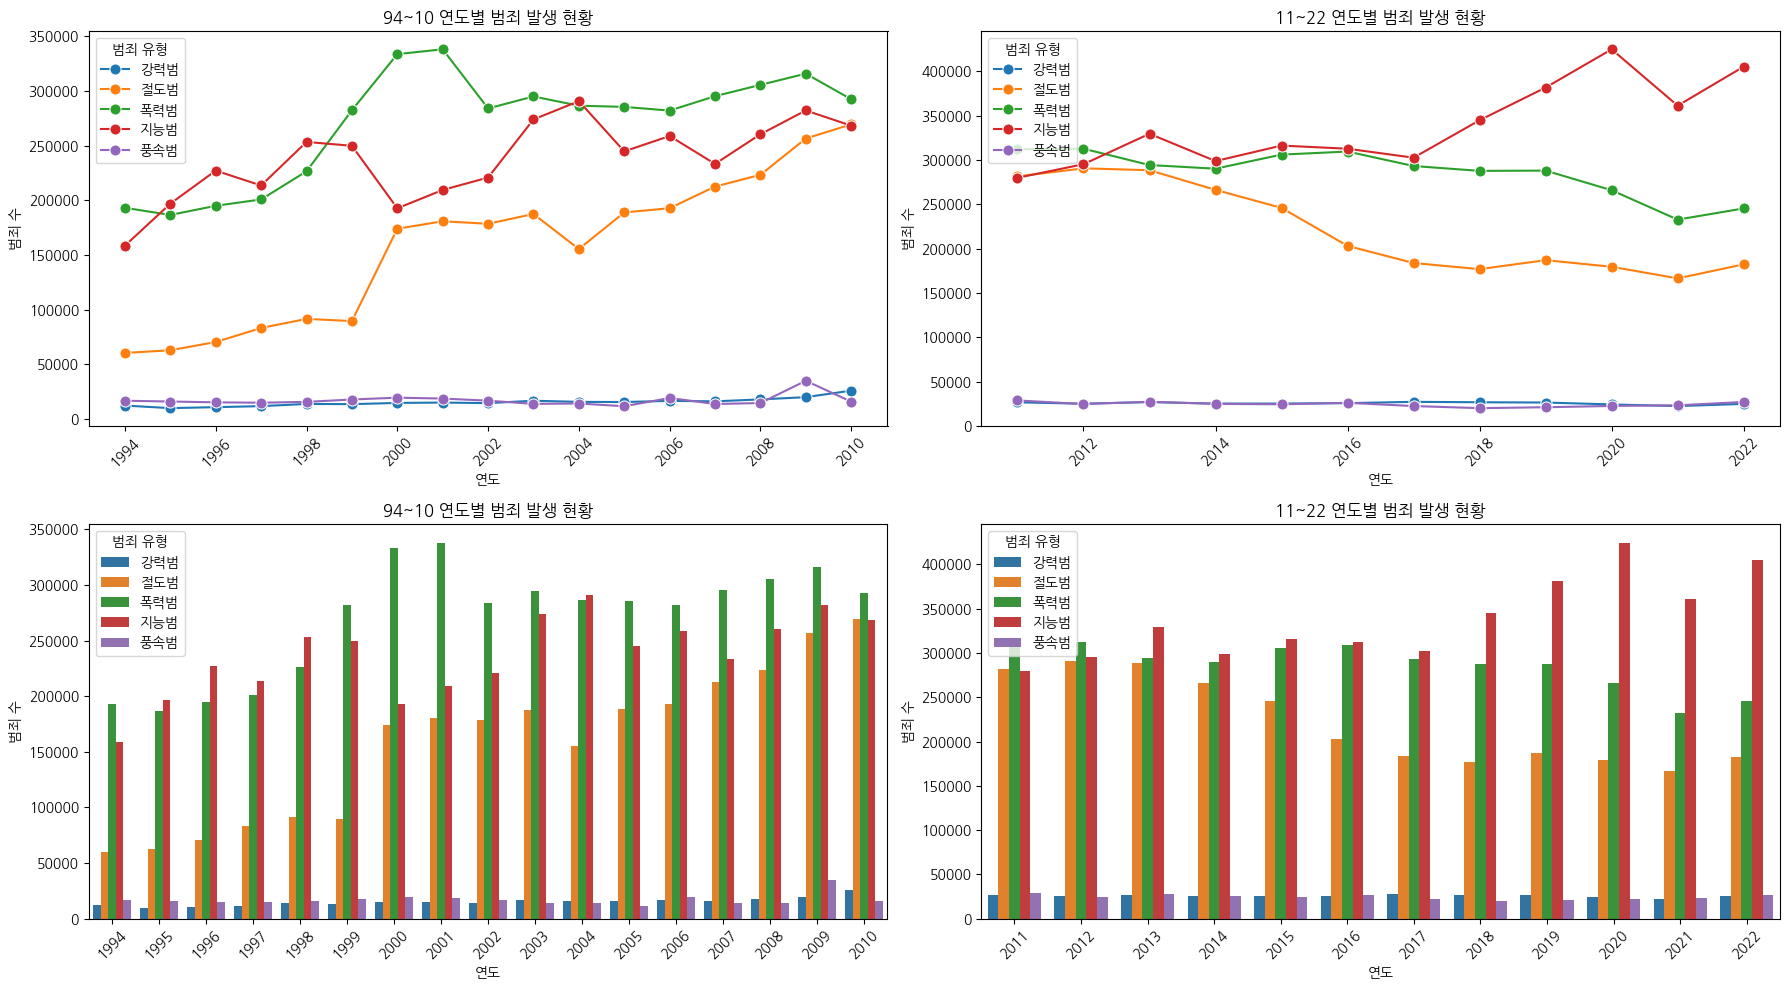

In [121]:
# 그래프 그리기
plt.figure(figsize=(18, 10))

# cate10 데이터프레임에 대한 lineplot
plt.subplot(2, 2, 1)
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df1, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('94~10 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')

# cate22 데이터프레임에 대한 lineplot
plt.subplot(2, 2, 2)
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df2, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('11~22 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')


# cate10 데이터프레임에 대한 barplot
plt.subplot(2, 2, 3)
sns.barplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df1)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('94~10 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')

# cate22 데이터프레임에 대한 barplot
plt.subplot(2, 2, 4)
sns.barplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df2)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('11~22 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')

plt.tight_layout()
plt.show()


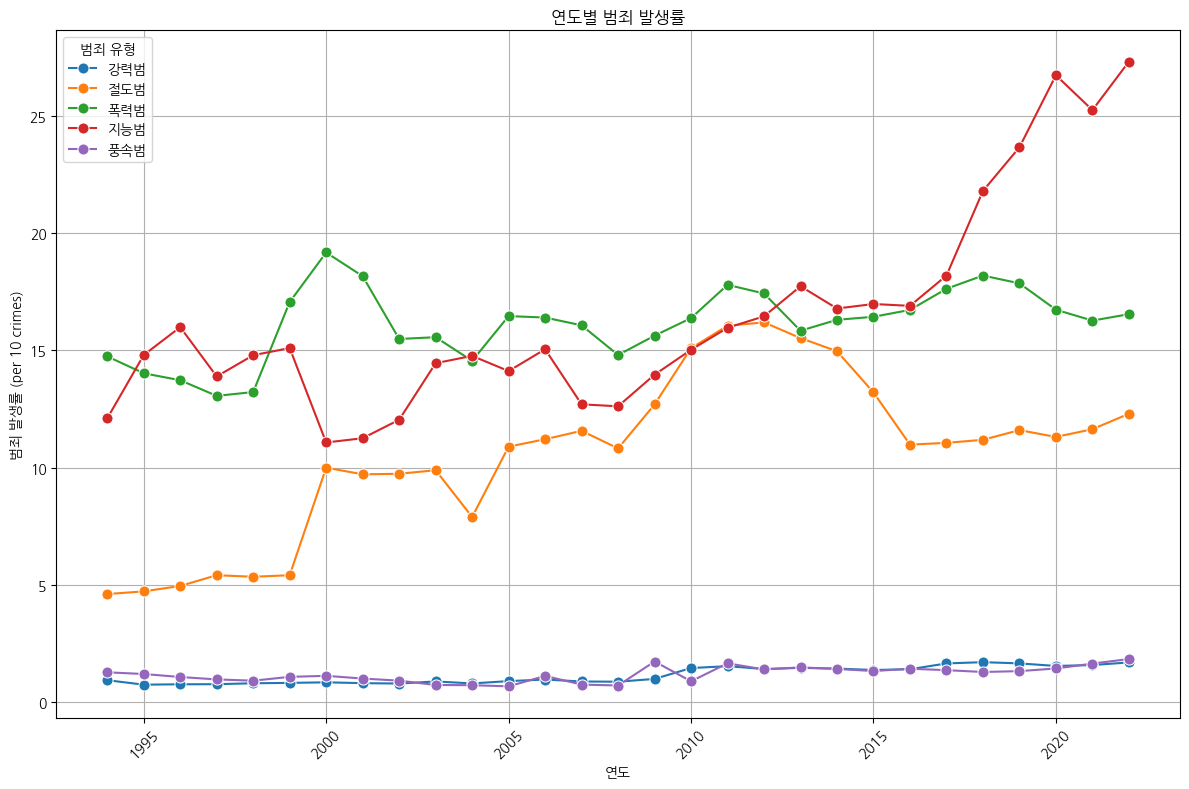

In [117]:
plt.figure(figsize=(12, 8))

# Plot each crime category's crime rate over the years
sns.lineplot(x='연도', y='강력범_발생률', data=total_cate2, marker='o', markersize=8, label='강력범')
sns.lineplot(x='연도', y='절도범_발생률', data=total_cate2, marker='o', markersize=8, label='절도범')
sns.lineplot(x='연도', y='폭력범_발생률', data=total_cate2, marker='o', markersize=8, label='폭력범')
sns.lineplot(x='연도', y='지능범_발생률', data=total_cate2, marker='o', markersize=8, label='지능범')
sns.lineplot(x='연도', y='풍속범_발생률', data=total_cate2, marker='o', markersize=8, label='풍속범')

# Customize labels and title
plt.xlabel('연도')
plt.ylabel('범죄 발생률 (per 10 crimes)')
plt.title('연도별 범죄 발생률')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='범죄 유형')

# Show plot
plt.tight_layout()
plt.show()

In [123]:
total_cate2

,연도,강력범,절도범,폭력범,지능범,풍속범,total,강력범_발생률,절도범_발생률,폭력범_발생률,지능범_발생률,풍속범_발생률
0,1994,12114,60255,193047,158399,16515,1309326,0.925209,4.601986,14.743998,12.097751,1.261336
1,1995,9762,62710,186490,196845,15815,1329694,0.734154,4.716123,14.025031,14.803782,1.189371
2,1996,10655,70238,194891,227064,15070,1419811,0.750452,4.946996,13.726545,15.992551,1.061409
3,1997,11599,83063,200675,213445,14722,1536652,0.754823,5.405453,13.059235,13.890263,0.958057
4,1998,13602,91438,226409,253297,15497,1712233,0.794401,5.340278,13.223025,14.793372,0.905075
5,1999,13400,89395,282274,249769,17655,1654064,0.810126,5.404567,17.065482,15.100323,1.067371
6,2000,14520,173876,333630,192574,19342,1739558,0.834695,9.995413,19.179010,11.070283,1.111892
7,2001,14858,180704,338045,209364,18519,1860687,0.798522,9.711682,18.167752,11.251973,0.995278
8,2002,14353,178457,283930,220719,16605,1833271,0.782918,9.734349,15.487617,12.039628,0.905758
9,2003,16519,187352,294893,273867,13668,1894762,0.871825,9.887891,15.563591,14.453900,0.721357


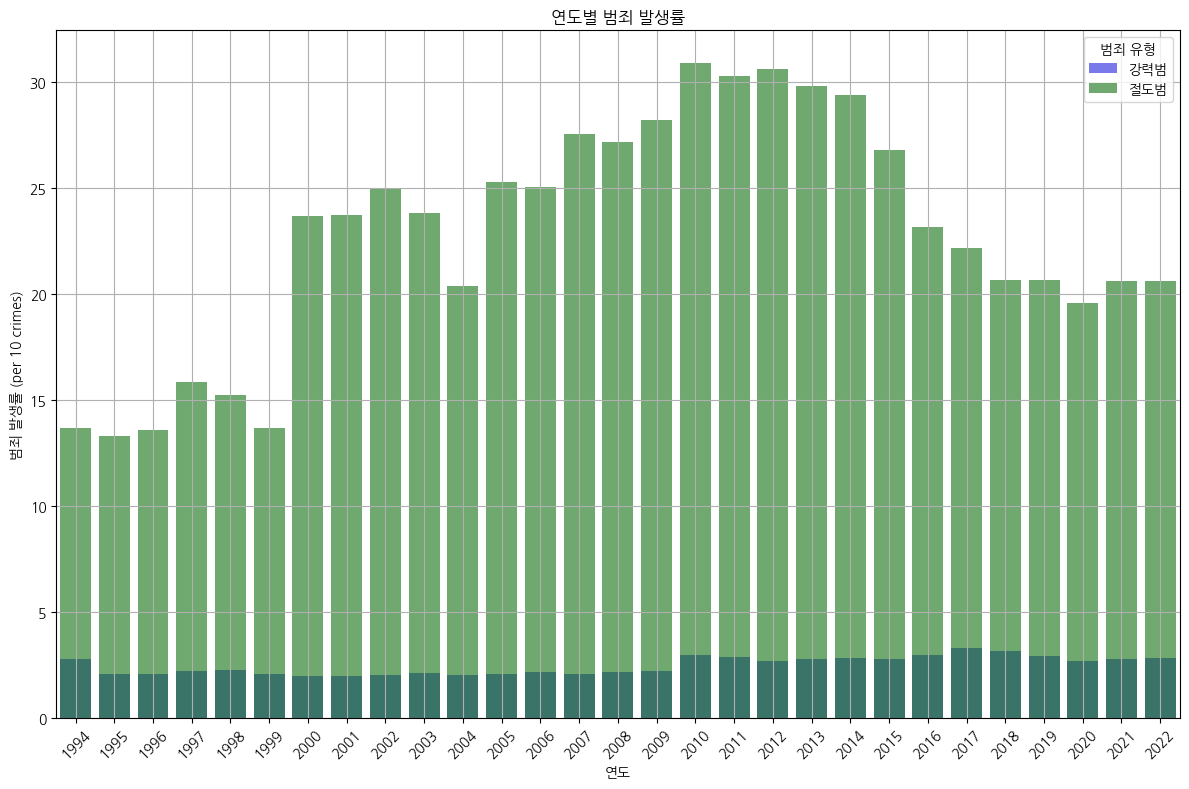

In [136]:
plt.figure(figsize=(12, 8))
sns.barplot(x='연도', y='강력범_발생률', data=total_cate2, color='b', alpha=0.6, label='강력범')
sns.barplot(x='연도', y='절도범_발생률', data=total_cate2, color='g', alpha=0.6, label='절도범')
plt.xlabel('연도')
plt.ylabel('범죄 발생률 (per 10 crimes)')
plt.title('연도별 범죄 발생률')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='범죄 유형')

# Show plot
plt.tight_layout()
plt.show()


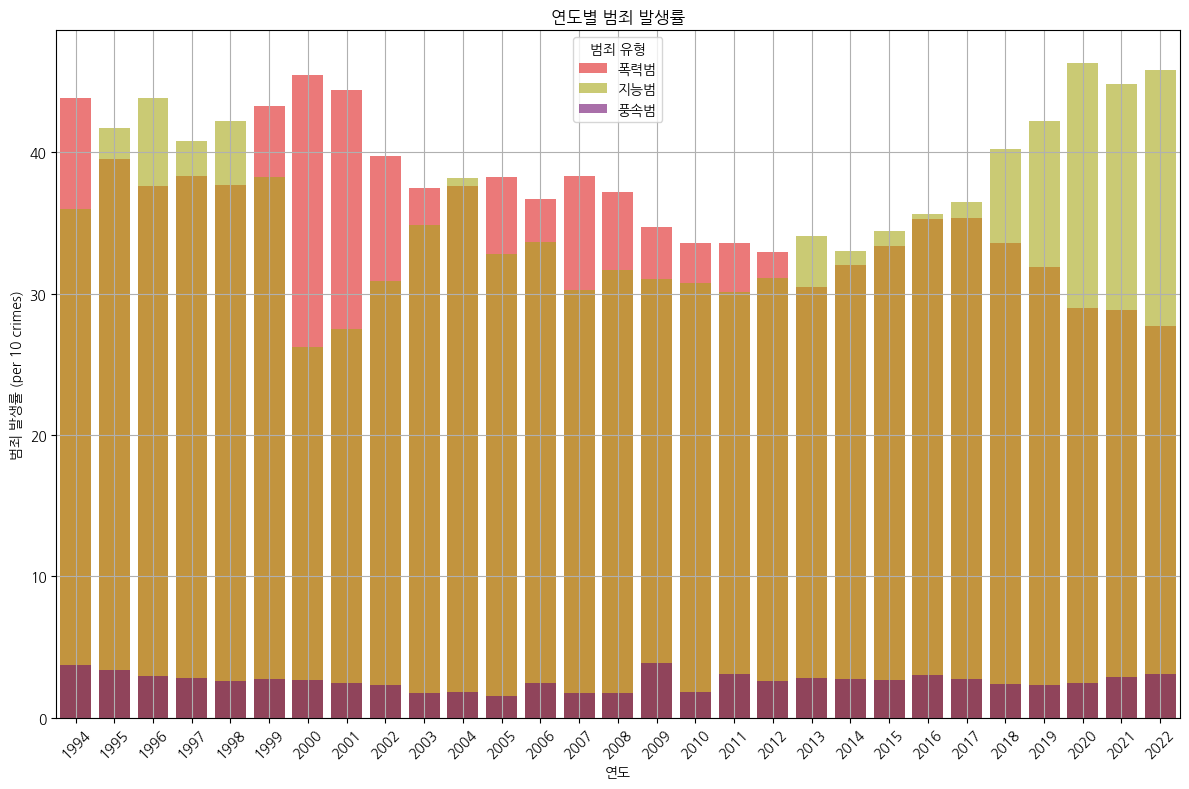

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Plotting bar plots for each crime category's crime rate over the years
sns.barplot(x='연도', y='폭력범_발생률', data=total_cate2, color='r', alpha=0.6, label='폭력범')
sns.barplot(x='연도', y='지능범_발생률', data=total_cate2, color='y', alpha=0.6, label='지능범')
sns.barplot(x='연도', y='풍속범_발생률', data=total_cate2, color='purple', alpha=0.6, label='풍속범')

# Customize labels and title
plt.xlabel('연도')
plt.ylabel('범죄 발생률 (per 10 crimes)')
plt.title('연도별 범죄 발생률')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='범죄 유형')

# Show plot
plt.tight_layout()
plt.show()


### 라인그래프 합쳐서 보여주기

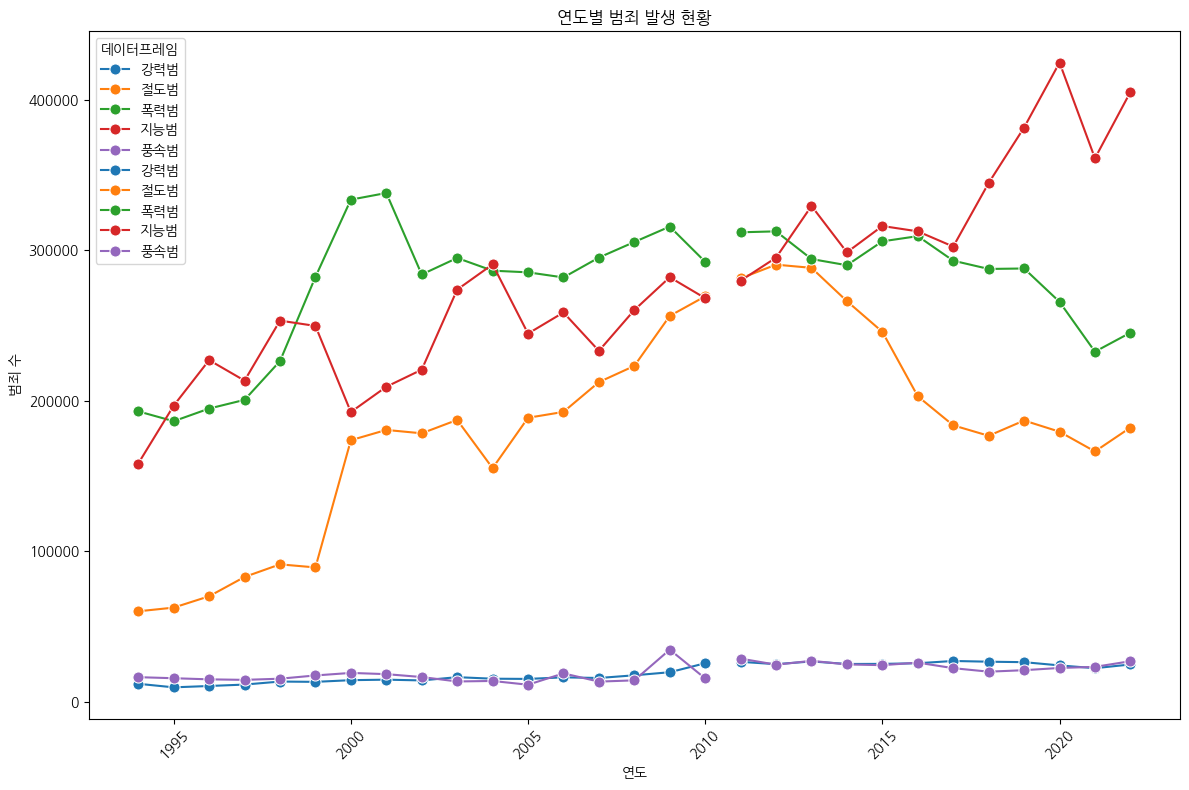

In [ ]:
# 그래프 그리기
plt.figure(figsize=(12, 8))

# cate10 데이터프레임에 대한 lineplot
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df1, marker='o', markersize=8)

# cate22 데이터프레임에 대한 lineplot
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df2, marker='o', markersize=8)

plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='데이터프레임', loc='upper left')

plt.tight_layout()
plt.show();